# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
#alt.renderers.enable("notebook")
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset:

In [26]:
df_path = "/Users/keerthanareddy/Downloads/Latest-News-Classifier-master/0. Latest News Classifier/01. Dataset Creation/"
df_path2 = df_path + 'News_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [27]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,Autonomous_new_1.txt,Self-driving car dilemmas reveal that moral ch...,Audi,Autonomous_new_1.txt-Audi
1,Atonomous_new_3.txt,Self-driving car dilemmas reveal that moral ch...,BMW,Atonomous_new_3.txt-BMW
2,Autonomous_new_2.txt,Self-driving car dilemmas reveal that moral ch...,Tesla,Autonomous_new_2.txt-Tesla


### Number of articles in each category

In [28]:
bars = alt.Chart(df).mark_bar(size=50).encode(
 x=alt.X("Category"),
 y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
 tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
 color='Category'
)
text = bars.mark_text(
 align='center',
 baseline='bottom',
).encode(
 text='count()'
)
(bars + text).interactive().properties(
 height=300,
 width=700,
 title = "Number of articles in each category",
)

alt.LayerChart(...)

### % of articles in each category

In [29]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [30]:
df['News_length'] = df['Content'].str.len()

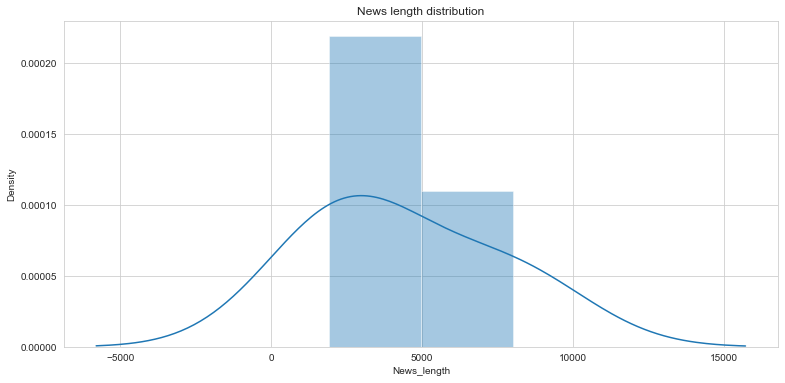

In [31]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [32]:
df['News_length'].describe()

count       3.000000
mean     4378.666667
std      3206.956553
min      1916.000000
25%      2565.500000
50%      3215.000000
75%      5610.000000
max      8005.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [33]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

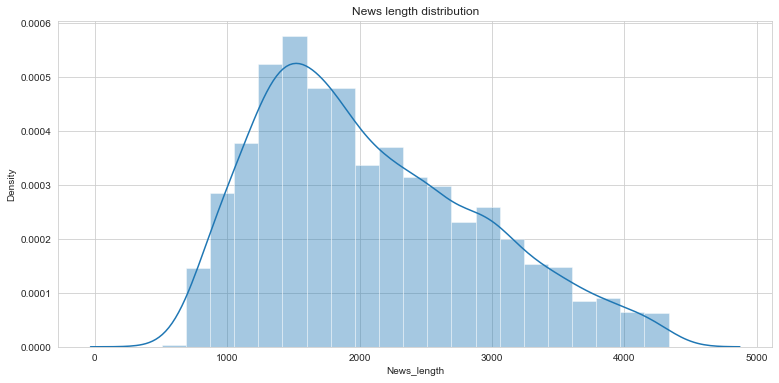

In [10]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [34]:
df_more10k = df[df['News_length'] > 1000]
len(df_more10k)

3

Let's see one:

In [35]:
df_more10k['Content'].iloc[0]

"Self-driving car dilemmas reveal that moral choices are not universal\r\nSurvey maps global variations in ethics for programming autonomous vehicles.\r\nAmy Maxmen\r\n  \r\n\r\nSelf-driving cars are being developed by several major technology companies and carmakers. credit: VCG/Getty\r\n\r\nWhen a driver slams on the brakes to avoid hitting a pedestrian crossing the road illegally, she is making a moral decision that shifts risk from the pedestrian to the people in the car. Self-driving cars might soon have to make such ethical judgments on their own â€” but settling on a universal moral code for the vehicles could be a thorny task, suggests a survey of 2.3 million people from around the world.\r\n\r\nThe largest ever survey of machine ethics1, published today in Nature, finds that many of the moral principles that guide a driverâ€™s decisions vary by country. For example, in a scenario in which some combination of pedestrians and passengers will die in a collision, people from relat

It's just a large news article.

Let's now plot a boxplot:

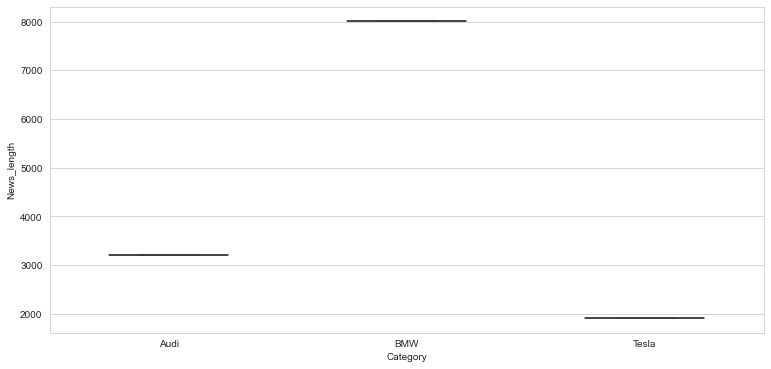

In [36]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

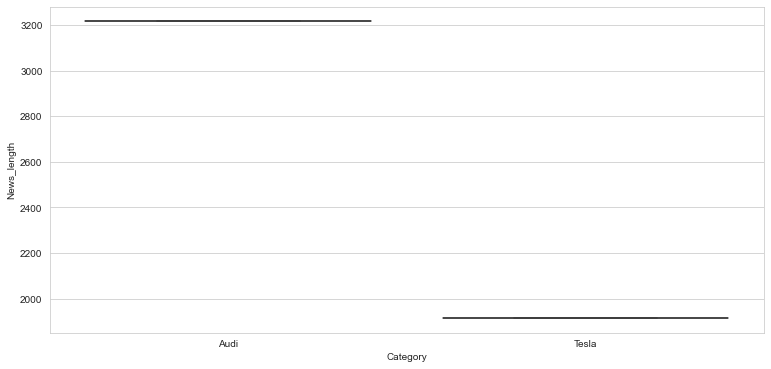

In [37]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [38]:
with open('News_dataset.pickle8', 'wb') as output:
    pickle.dump(df, output)